In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

In [38]:
os.getcwd()

'/home/stephen/phd/modelling/pipeline/workflow/scripts'

In [2]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 18

In [7]:
def jaccard(a, b):
    """ Jaccard similiarity
        Proportion of 1-1 exlucing 0-0 cases """
    
    # Filter both-zero pairs (non-informative)
    nonZero = (a + b) != 0
    a = a[nonZero]
    b = b[nonZero]
    # Skip if not enough sample remaining
    nSamples = 100
    if len(a) < nSamples:
        return np.nan
    # Randomly sample values from non-zero pairs
    mask = np.full(len(a), False)
    mask[: nSamples] = True
    mask = np.random.permutation(mask)
    a = a[mask]
    b = b[mask]
    return jaccard_score(a, b)

In [8]:
file = pd.read_csv('/media/stephen/Data/syntheticModelWithExtrusion/exampleSynthetic-TU-TADstatus.csv.gz', chunksize=2100210)

In [9]:
a = []
for i, rep in enumerate(file):
    TUcorr = rep.groupby(['TU1', 'TU2', 'rep', 'TADstatus'])[['active-TU1', 'active-TU2']].corr(method=jaccard)
    TUcorr = TUcorr.reset_index().iloc[::2,].drop(['level_4', 'active-TU1'], axis=1).dropna()
    TUcorr = TUcorr.rename(columns={'active-TU2': 'correlation'})
    a.append(TUcorr)
a = pd.concat(a)

In [31]:
summary = (
    a.pivot(index=['TU1', 'TU2', 'rep'], columns='TADstatus')
    .droplevel(0, axis=1)[['sameTAD', 'adjacentBoundary', 'sameNotTAD']]
    .dropna()
    .reset_index()
    .melt(id_vars=['TU1', 'TU2', 'rep']))
summary['TUpair'] = summary['TU1'].astype(str) + '-' + summary['TU2'].astype(str)

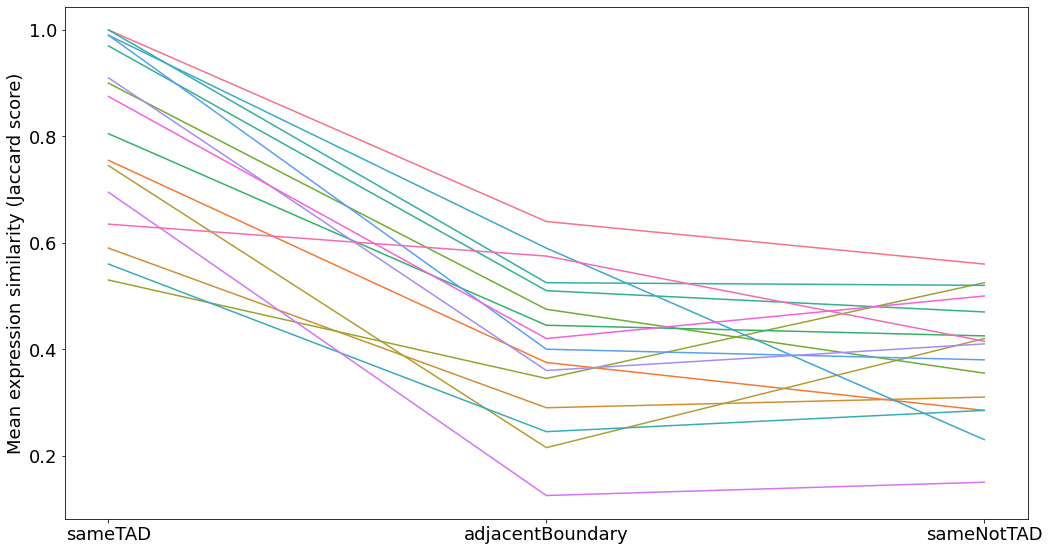

In [37]:
fig, ax = plt.subplots()
sns.lineplot(x='TADstatus', y='value', hue='TUpair', estimator='median', ci=None, legend=False, data=summary, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Mean expression similarity (Jaccard score)')
fig.tight_layout()
fig.savefig('/media/stephen/Data/syntheticModelWithExtrusion/plots/TUpairSimilarity.png')

/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


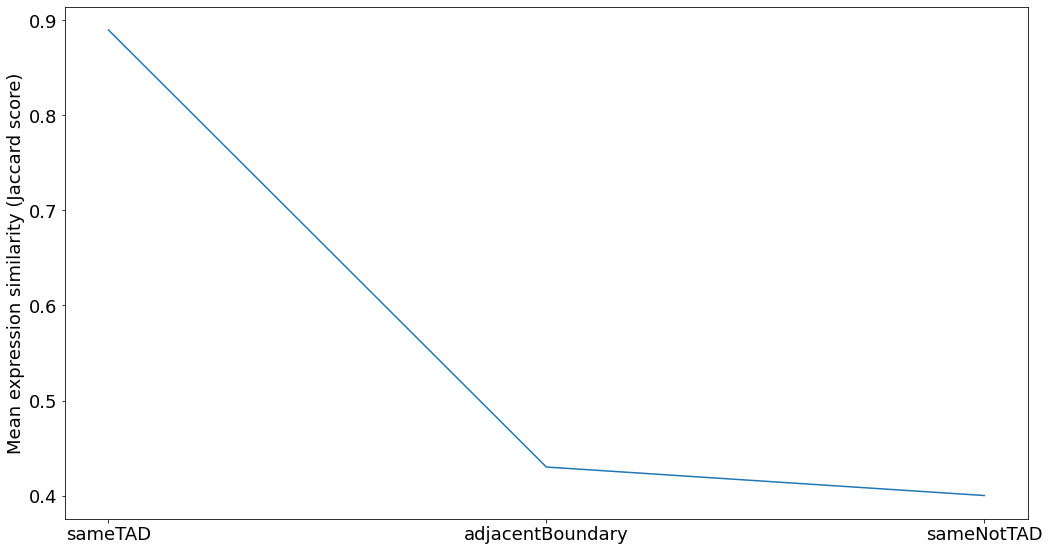

In [36]:
fig, ax = plt.subplots()
sns.lineplot(x='TADstatus', y='value', estimator='median', ci=None, legend=False, data=summary, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Mean expression similarity (Jaccard score)')
fig.tight_layout()
fig.show()